In [1]:
import numpy as np
import matplotlib.pyplot as plt
from eomdp import utils as ut

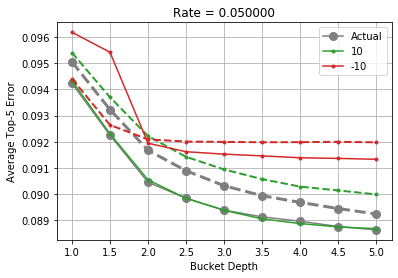

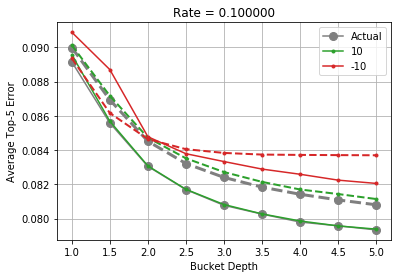

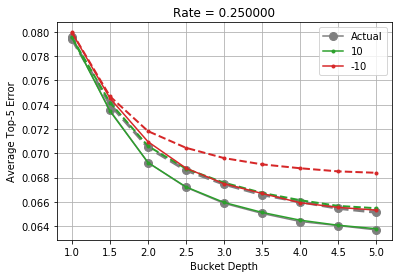

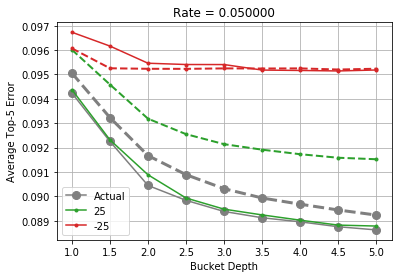

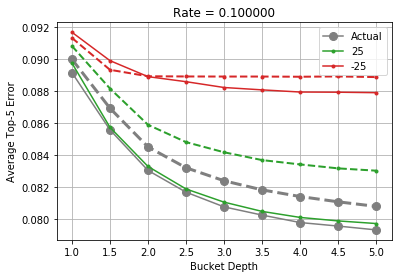

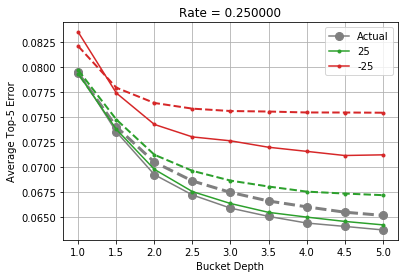

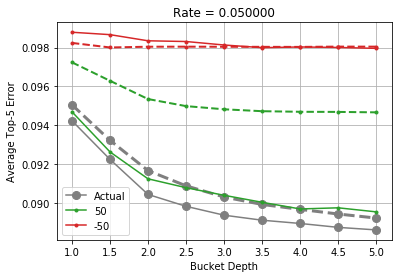

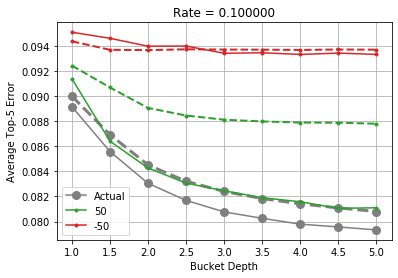

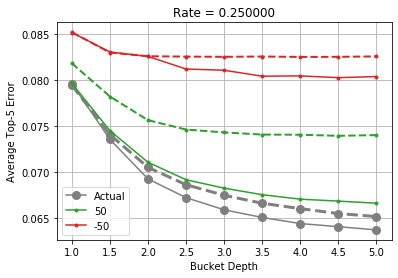

In [2]:
# Load data and plot performance

depths = np.arange(2, 11, dtype=np.float64)/2
c = 1
clrid = [2, 3]
for m in [10, 25, 50]:
    devs = [1*m, -1*m]
    for r in [0.05, 0.1, 0.25]:
        costs = np.zeros((len(devs)+1, len(depths)), np.float64)
        nvcosts = np.zeros((len(devs)+1, len(depths)), np.float64)
        for i, b in enumerate(depths):
            dt = np.load('save/1cam_r%03d_bdepth%d_cost%d.npz' % (int(r*1000), int(b*10), c))
            costs[0, i] = dt['mdpcost']
            nvcosts[0, i] = dt['naivecost']
            for k, d in enumerate(devs):
                dt = np.load('save/1cam_r%03d_bdepth%d_cost%d_dev%d.npz' % (int(r*1000), int(b*10), c, d))
                costs[k+1, i] = dt['mdpcost']
                nvcosts[k+1, i] = dt['naivecost']
        plt.Figure()
        plt.plot(depths, nvcosts[0, :], '--oC7', markersize=8, linewidth=3)    
        plt.plot(depths, costs[0, :], '-oC7', label='Actual', markersize=8)    
        for k, d in enumerate(devs):
            plt.plot(depths, nvcosts[k+1, :], '--oC%d' % clrid[k], markersize=3, linewidth=2)
            plt.plot(depths, costs[k+1, :], '-oC%d' % clrid[k], label=str(d), markersize=3)
        plt.xlabel('Bucket Depth'); plt.ylabel('Average Top-5 Error'); plt.title('Rate = %f' % r);
        plt.grid(); plt.legend(); plt.show();